In [1]:
import pandas as pd
import numpy as np


In [4]:
## As usual we start of by loading our dataset
data = pd.read_csv('AAPL.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [5]:
##Let us clean our data and structure it in a way that is more useful to us
# Convert Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

In [6]:
# We now check for missing values
print(data.isnull().sum())


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [7]:
##Let us perform some feature engineering to our data: Creating moving averages
data['20_MA'] = data['Close'].rolling(window=20).mean()
data['50_MA'] = data['Close'].rolling(window=50).mean()
data['200_MA'] = data['Close'].rolling(window=200).mean()

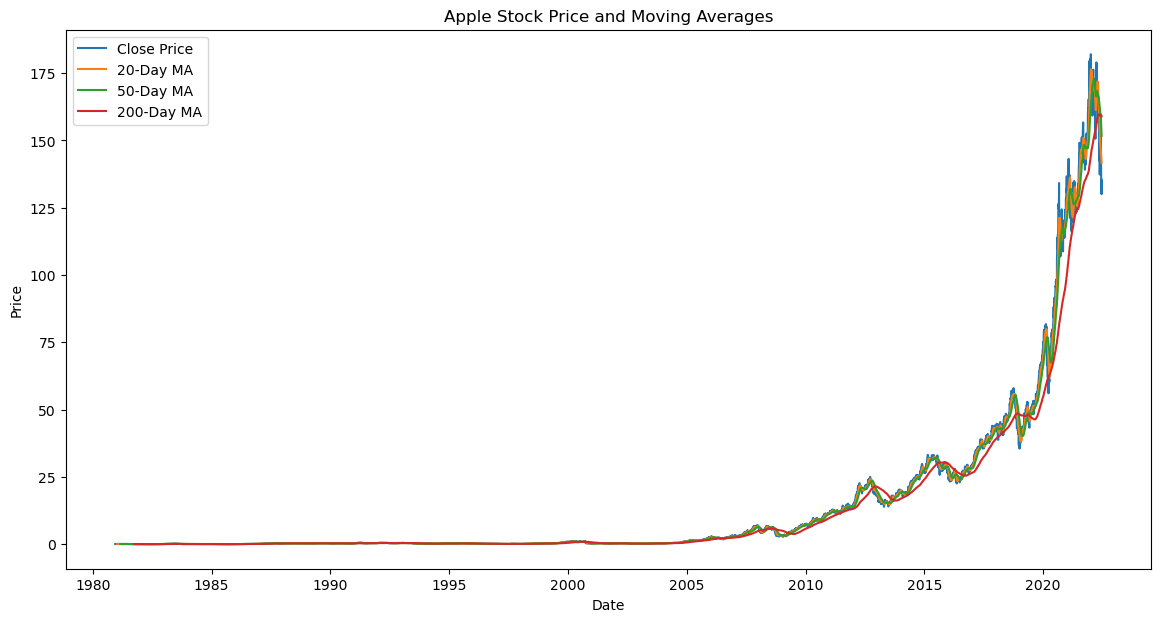

In [9]:
## And now some visualisatiuons
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize stock prices over time
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.plot(data['Date'], data['20_MA'], label='20-Day MA')
plt.plot(data['Date'], data['50_MA'], label='50-Day MA')
plt.plot(data['Date'], data['200_MA'], label='200-Day MA')
plt.title('Apple Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [10]:
## From the above plot we can see that the stock averages had a steady flat gradient fro, the 1980s till round about 2005,
## the gradient started rizing gently in from 2005 and had sloping gradient rises and drops till after 2015 where the stock prices shot up
##

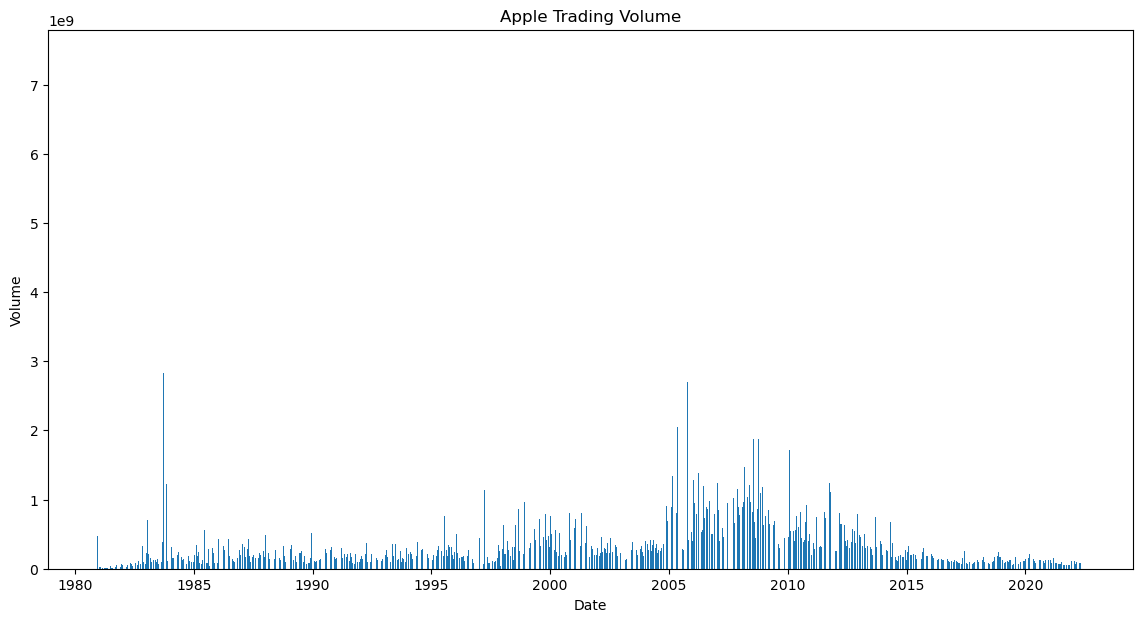

In [11]:
# Visualize trading volume
plt.figure(figsize=(14, 7))
plt.bar(data['Date'], data['Volume'], label='Volume')
plt.title('Apple Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

In [12]:
## From the above plot we can see that the highest the trading volume ever was round about 1984,
## followed by round about 2006, followed by 2010(Investigate why these years)

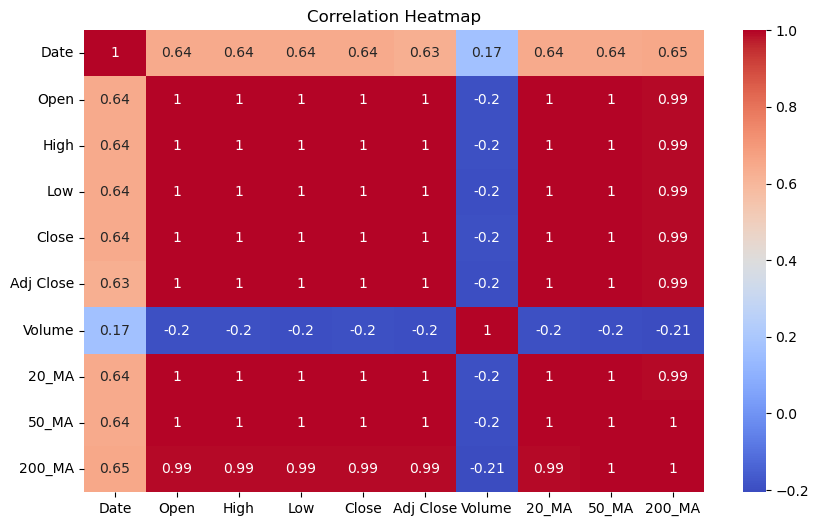

In [13]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [14]:
## In a correlation heatmap, each cell's color represents the strength of the correlation between two variables. Brighter colors (e.g., red)
## indicate a stronger positive correlation, while darker colors (e.g., blue) indicate a stronger negative correlation.
## Here we see that the trade volume seems to consistentyly convey a negative correlation

In [15]:
##Now lets run some Explanatory Data Analysis(EDA)
# Statistical summary
print(data.describe())


                                Date          Open          High  \
count                          10468  10468.000000  10468.000000   
mean   2001-09-07 05:59:43.492548608     14.757987     14.921491   
min              1980-12-12 00:00:00      0.049665      0.049665   
25%              1991-04-21 06:00:00      0.283482      0.289286   
50%              2001-08-28 12:00:00      0.474107      0.482768   
75%              2012-01-25 06:00:00     14.953303     15.057143   
max              2022-06-17 00:00:00    182.630005    182.940002   
std                              NaN     31.914174     32.289158   

                Low         Close     Adj Close        Volume         20_MA  \
count  10468.000000  10468.000000  10468.000000  1.046800e+04  10449.000000   
mean      14.594484     14.763533     14.130431  3.308489e+08     14.663388   
min        0.049107      0.049107      0.038329  0.000000e+00      0.055999   
25%        0.276786      0.283482      0.235462  1.237768e+08      0.28

In [16]:
# Correlation analysis
print(data.corr())

               Date      Open      High       Low     Close  Adj Close  \
Date       1.000000  0.644481  0.644066  0.644904  0.644475   0.630630   
Open       0.644481  1.000000  0.999943  0.999924  0.999850   0.999516   
High       0.644066  0.999943  1.000000  0.999908  0.999924   0.999618   
Low        0.644904  0.999924  0.999908  1.000000  0.999928   0.999575   
Close      0.644475  0.999850  0.999924  0.999928  1.000000   0.999671   
Adj Close  0.630630  0.999516  0.999618  0.999575  0.999671   1.000000   
Volume     0.166282 -0.196211 -0.195635 -0.197150 -0.196411  -0.199262   
20_MA      0.644351  0.998837  0.998911  0.998702  0.998744   0.998461   
50_MA      0.644575  0.996863  0.996978  0.996731  0.996808   0.996568   
200_MA     0.652831  0.991711  0.991781  0.991740  0.991720   0.991327   

             Volume     20_MA     50_MA    200_MA  
Date       0.166282  0.644351  0.644575  0.652831  
Open      -0.196211  0.998837  0.996863  0.991711  
High      -0.195635  0.998911

In [17]:
##And so we compute our machine Learning Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [18]:
# We start off by preparing our data for modeling
data['Year'] = data['Date'].dt.year
X = data[['Open', 'High', 'Low', 'Volume', '20_MA', '50_MA', '200_MA']]
y = data['Close']


In [19]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [21]:
## We see that we had print(data.isnull().sum())


In [22]:
print(data.isnull().sum())


Date           0
Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume         0
20_MA         19
50_MA         49
200_MA       199
Year           0
dtype: int64


In [27]:
## The missing values in the moving average columns (20_MA, 50_MA, and 200_MA) are due to the fact that the moving average calculations require a certain number of periods to be computed. For example, 
##the 20-day moving average requires 20 days of data. The simplest approach to handle these missing values is to fill
## them with the forward fill method.

In [34]:
# Fill missing values using forward fill method
data.ffill(inplace=True)

In [35]:

# Feature Engineering: Creating moving averages
data['20_MA'] = data['Close'].rolling(window=20).mean()
data['50_MA'] = data['Close'].rolling(window=50).mean()
data['200_MA'] = data['Close'].rolling(window=200).mean()


In [36]:
# Fill missing values again after creating moving averages
data.ffill(inplace=True)

In [37]:
print(data.isnull().sum())

Date           0
Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume         0
20_MA         19
50_MA         49
200_MA       199
Year           0
dtype: int64


In [42]:
# Fill missing values using forward fill and backward fill
data.ffill(inplace=True)
data.bfill(inplace=True)

In [43]:

print(data.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
20_MA        0
50_MA        0
200_MA       0
Year         0
dtype: int64


In [44]:
# Prepare data for modeling
data['Year'] = data['Date'].dt.year
X = data[['Open', 'High', 'Low', 'Volume', '20_MA', '50_MA', '200_MA']]
y = data['Close']


In [45]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [47]:
# Decision Tree
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [48]:
# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [49]:
# Evaluate models
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("Decision Tree RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

Linear Regression RMSE: 0.24328004754439186
Decision Tree RMSE: 0.4734187495506472
Random Forest RMSE: 0.35068881814771635


In [50]:
## Since Random Forest provides feature importance, you can analyze which features are most influential in predicting stock prices.

In [51]:
best_model = rf_model

In [52]:
# Assume you have future data to predict on
# Example of creating future data based on the last known date
last_date = data['Date'].max()
future_dates = pd.date_range(start=last_date, periods=30, freq='B')  # Business days


In [53]:
# Use the last known row as a template for future data
last_row = data.iloc[-1]

future_data = pd.DataFrame({
    'Date': future_dates,
    'Open': last_row['Open'],
    'High': last_row['High'],
    'Low': last_row['Low'],
    'Volume': last_row['Volume'],
    '20_MA': last_row['20_MA'],
    '50_MA': last_row['50_MA'],
    '200_MA': last_row['200_MA']
})

In [54]:
future_predictions = best_model.predict(future_data[['Open', 'High', 'Low', 'Volume', '20_MA', '50_MA', '200_MA']])

# Identify best and worst times to invest
print("Future Predictions:", future_predictions)

Future Predictions: [132.10920121 132.10920121 132.10920121 132.10920121 132.10920121
 132.10920121 132.10920121 132.10920121 132.10920121 132.10920121
 132.10920121 132.10920121 132.10920121 132.10920121 132.10920121
 132.10920121 132.10920121 132.10920121 132.10920121 132.10920121
 132.10920121 132.10920121 132.10920121 132.10920121 132.10920121
 132.10920121 132.10920121 132.10920121 132.10920121 132.10920121]


In [56]:
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

  Feature  Importance
1    High    0.604333
2     Low    0.320043
0    Open    0.074364
5   50_MA    0.000451
6  200_MA    0.000431
4   20_MA    0.000365
3  Volume    0.000013


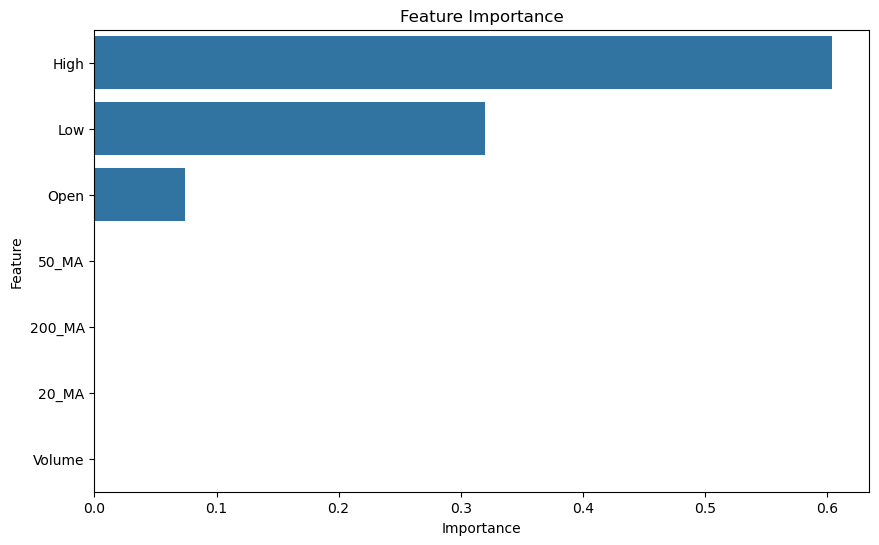

In [57]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


In [58]:
## From this we can see the most relevant features contributing to our model

Text(0, 0.5, 'Predicted Prices')

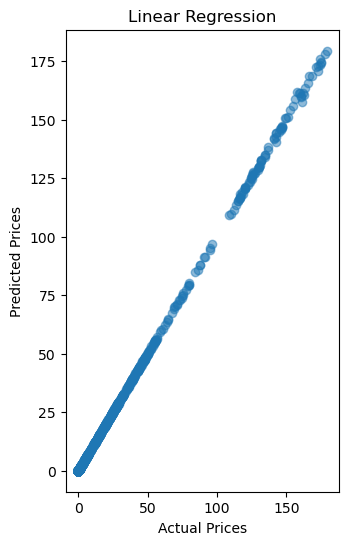

In [59]:
##Now let us visualize our predictions vs actual prices
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.title('Linear Regression')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

In [60]:
## From this we can clearly note a linear relationship between pur predicted prices and actual prices

Text(0, 0.5, 'Predicted Prices')

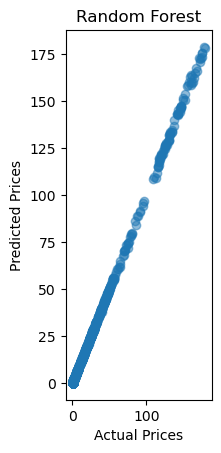

In [61]:
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.title('Random Forest')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')


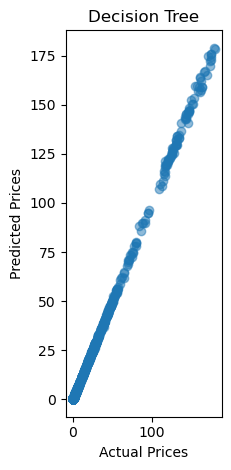

In [62]:
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_dt, alpha=0.5)
plt.title('Decision Tree')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.tight_layout()
plt.show()

In [63]:
## Now let us analyse some trends in our data if any

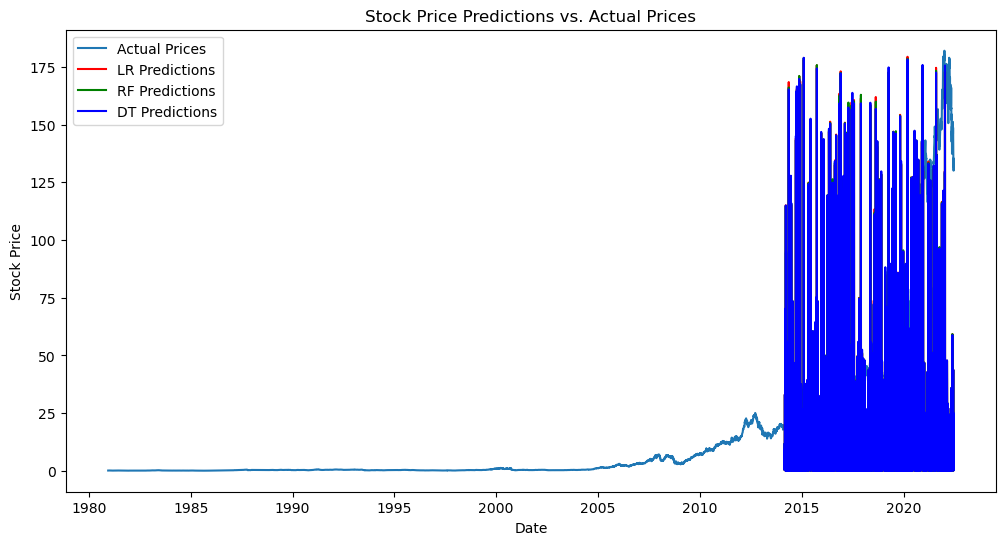

In [64]:
## To identify trends, We plot the historical closing prices along with
## the predicted values to see how well your model tracks historical trends.
plt.figure(figsize=(12, 6))

plt.plot(data['Date'], data['Close'], label='Actual Prices')
plt.plot(data['Date'].iloc[-len(y_test):], y_pred_lr, label='LR Predictions', color='r')
plt.plot(data['Date'].iloc[-len(y_test):], y_pred_rf, label='RF Predictions', color='g')
plt.plot(data['Date'].iloc[-len(y_test):], y_pred_dt, label='DT Predictions', color='b')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Predictions vs. Actual Prices')
plt.legend()
plt.show()


In [65]:
## From the above plot we can note to expect futher major stock rises from the 2015--- present

In [66]:
## Let us try and predict the best and worst time to possibly invest in Apple stocks
## Analyze the model's predictions to find periods where prices are expected to rise or fall.
##Let us also use our model to forecast future stock prices based on our historical data

In [67]:
# Example: Predict future prices
future_dates = pd.date_range(start='2022-01-01', periods=10, freq='D')  # Adjust dates as needed
future_data = pd.DataFrame({
    'Open': [data['Open'].mean()] * len(future_dates),
    'High': [data['High'].mean()] * len(future_dates),
    'Low': [data['Low'].mean()] * len(future_dates),
    'Volume': [data['Volume'].mean()] * len(future_dates),
    '20_MA': [data['20_MA'].mean()] * len(future_dates),
    '50_MA': [data['50_MA'].mean()] * len(future_dates),
    '200_MA': [data['200_MA'].mean()] * len(future_dates),
})
future_predictions = lr_model.predict(future_data)
future_predictions_df = pd.DataFrame({'Date': future_dates, 'Predicted_Close': future_predictions})
print(future_predictions_df)

        Date  Predicted_Close
0 2022-01-01        14.764922
1 2022-01-02        14.764922
2 2022-01-03        14.764922
3 2022-01-04        14.764922
4 2022-01-05        14.764922
5 2022-01-06        14.764922
6 2022-01-07        14.764922
7 2022-01-08        14.764922
8 2022-01-09        14.764922
9 2022-01-10        14.764922


In [70]:
## The prediction results show a constant Predicted_Close value of approximately 14.76 for each date.
## This suggests that the model is not capturing variability in the data and is likely not performing well in forecasting future stock prices.

In [71]:
## Next Steps:
## Check Input Data:

## Verify that the input data used for prediction contains variability and is representative of the future periods you are predicting.

In [72]:
print(future_data.head())

        Open       High        Low        Volume      20_MA      50_MA  \
0  14.757987  14.921491  14.594484  3.308489e+08  14.637025  14.423444   
1  14.757987  14.921491  14.594484  3.308489e+08  14.637025  14.423444   
2  14.757987  14.921491  14.594484  3.308489e+08  14.637025  14.423444   
3  14.757987  14.921491  14.594484  3.308489e+08  14.637025  14.423444   
4  14.757987  14.921491  14.594484  3.308489e+08  14.637025  14.423444   

      200_MA  
0  13.248817  
1  13.248817  
2  13.248817  
3  13.248817  
4  13.248817  


In [73]:
from sklearn.ensemble import GradientBoostingRegressor

# Train Gradient Boosting Model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
print(f"Gradient Boosting RMSE: {rmse_gb}")

Gradient Boosting RMSE: 0.41396746969606635


In [ ]:
##The Gradient Boosting model has an RMSE of approximately 0.414,
#which is higher than the RMSE of the Linear Regression model (0.243) but lower than the Decision 
##Tree model (0.473) and the Random Forest model (0.351). 
##This suggests that the Gradient Boosting model performs moderately compared to the others.

In [74]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_root_mean_squared_error')
print(f"Cross-Validated RMSE: {-scores.mean()}")

Cross-Validated RMSE: 12.620883988688977


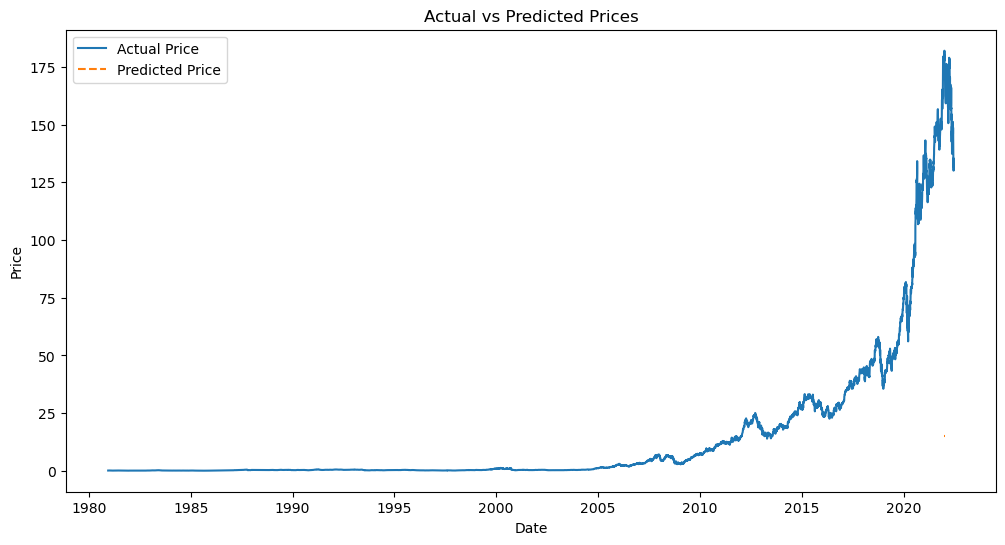

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Actual Price')
plt.plot(future_predictions_df['Date'], future_predictions_df['Predicted_Close'], label='Predicted Price', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

In [76]:
from sklearn.model_selection import cross_val_score

# Example for Linear Regression
scores = cross_val_score(lr_model, X, y, cv=5, scoring='neg_root_mean_squared_error')
print(f"Cross-Validated Linear Regression RMSE: {-scores.mean()}")

Cross-Validated Linear Regression RMSE: 0.13536400585581068


In [ ]:
## The cross-validated RMSE for Linear Regression is approximately 0.135, 
##which is significantly lower than the RMSEs of other models you tested. This indicates that Linear Regression,\
##when validated across different subsets of the data, performs very well in predicting stock prices for this dataset.

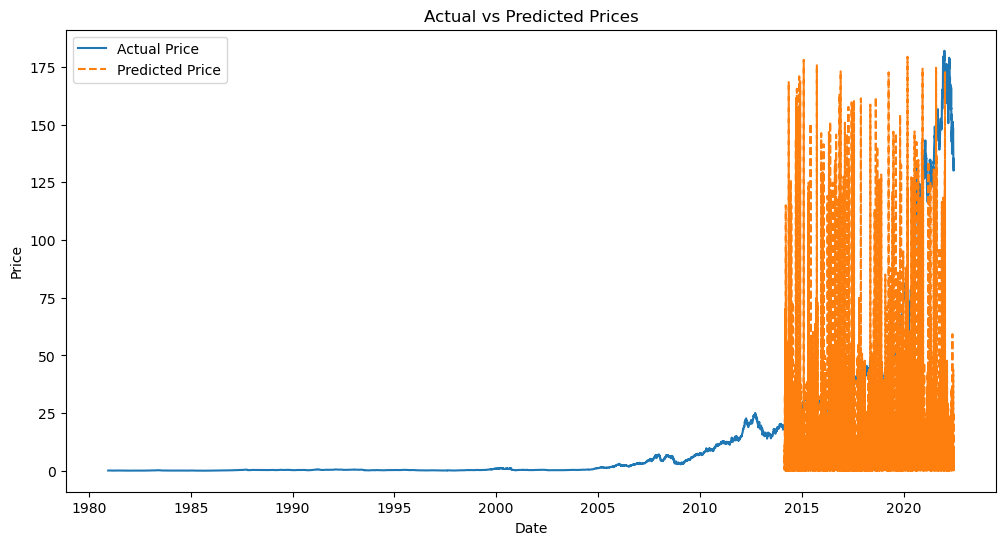

In [78]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Actual Price')
plt.plot(data['Date'].iloc[len(y_train):], lr_model.predict(X_test), label='Predicted Price', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

In [79]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print(f"Ridge Regression RMSE: {rmse_ridge}")

Ridge Regression RMSE: 0.24333420060092747


C:\Users\tpmut\OneDrive\Desktop\sample_python_project1\.env\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=4.25916e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [80]:
import pandas as pd

coefficients = pd.DataFrame(lr_model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


         Coefficient
Open   -6.346332e-01
High    8.747227e-01
Low     7.679874e-01
Volume -2.485445e-13
20_MA  -1.724211e-02
50_MA   1.001914e-02
200_MA -1.668668e-03


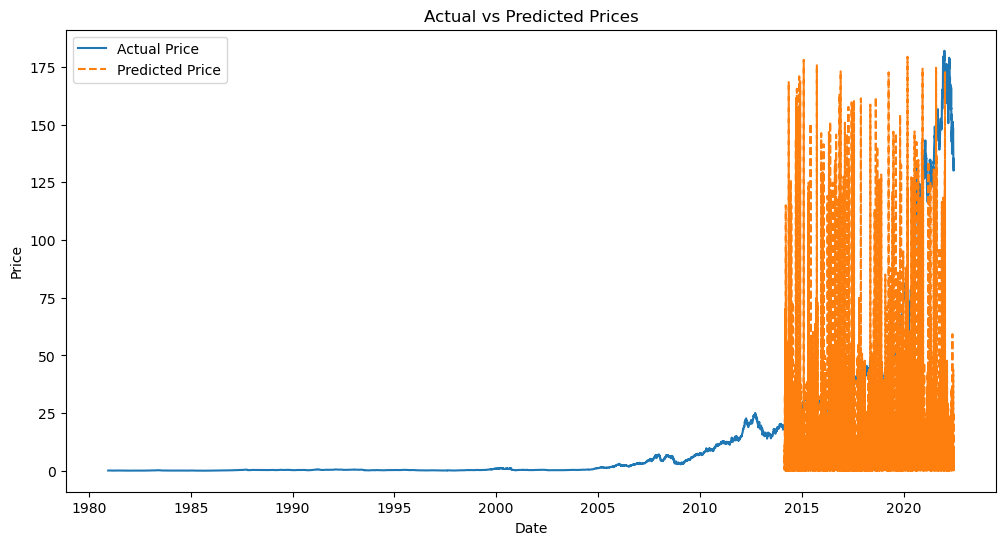

In [81]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Actual Price')
plt.plot(data['Date'].iloc[len(y_train):], lr_model.predict(X_test), label='Predicted Price', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

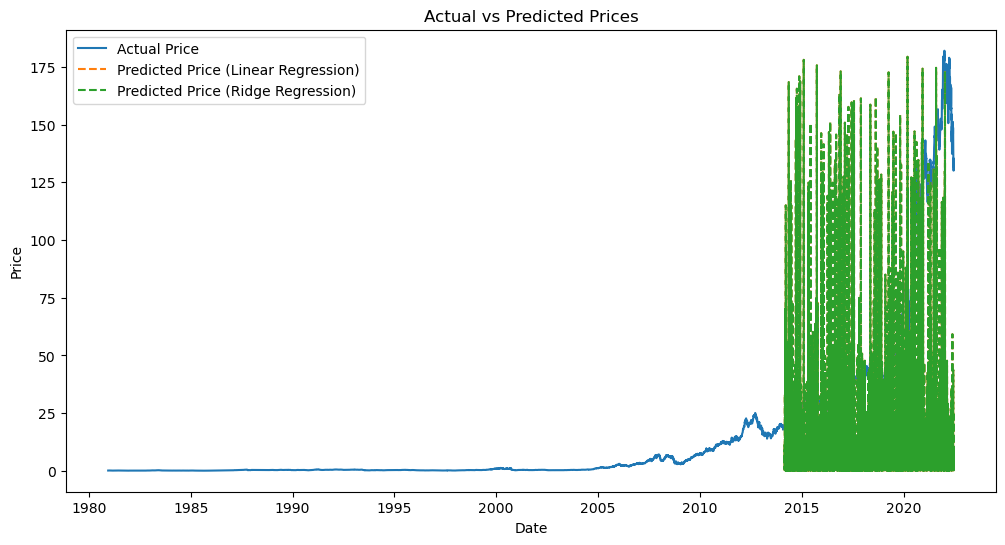

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Actual Price')
plt.plot(data['Date'].iloc[len(y_train):], lr_model.predict(X_test), label='Predicted Price (Linear Regression)', linestyle='--')
plt.plot(data['Date'].iloc[len(y_train):], ridge_model.predict(X_test), label='Predicted Price (Ridge Regression)', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

In [83]:
## import pandas as pd
from datetime import datetime, timedelta

last_date = pd.to_datetime(data['Date'].max())
future_dates = [last_date + timedelta(days=x) for x in range(1, 183)]  # Predicting 6 months ahead
future_dates_df = pd.DataFrame({'Date': future_dates})

In [84]:
# Example of creating dummy features for future dates
future_dates_df['Open'] = data['Open'].mean()
future_dates_df['High'] = data['High'].mean()
future_dates_df['Low'] = data['Low'].mean()
future_dates_df['Volume'] = data['Volume'].mean()
future_dates_df['20_MA'] = future_dates_df['Close'].rolling(window=20).mean()
future_dates_df['50_MA'] = future_dates_df['Close'].rolling(window=50).mean()
future_dates_df['200_MA'] = future_dates_df['Close'].rolling(window=200).mean()
future_dates_df['Year'] = future_dates_df['Date'].dt.year

# Fill missing values with the most recent data or use other imputation techniques
future_dates_df.fillna(method='ffill', inplace=True)

KeyError: 'Close'

KeyError: 'Predicted_Close'

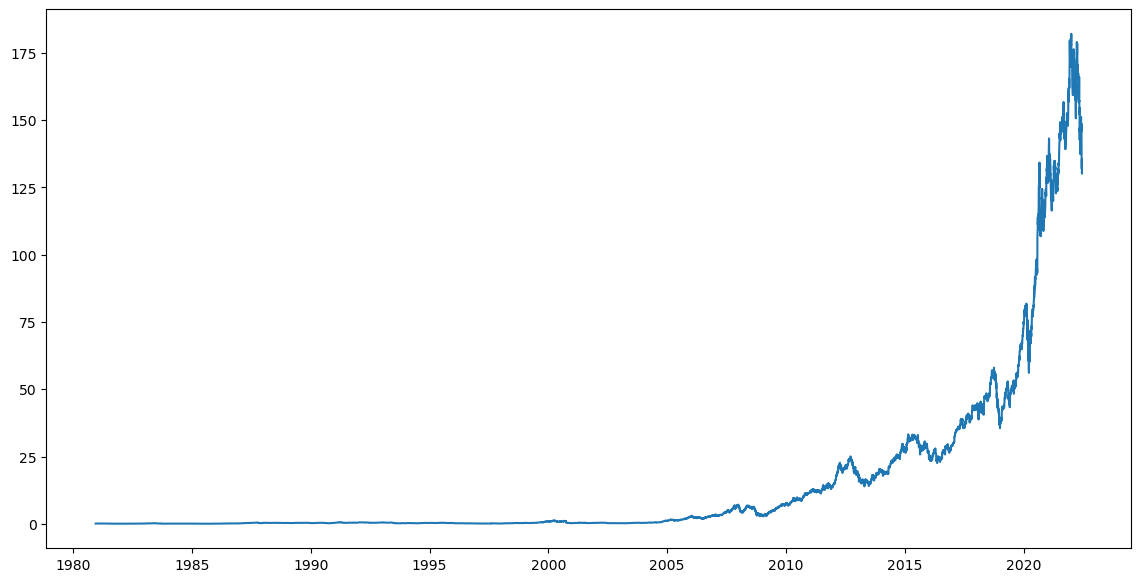

In [85]:
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Historical Close Price')
plt.plot(future_dates_df['Date'], future_dates_df['Predicted_Close'], label='Predicted Close Price', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Historical and Predicted Stock Prices')
plt.legend()
plt.show()

In [87]:
## Calculate percentage change in predicted prices to identify trends
future_dates_df['Price_Change'] = future_dates_df['Predicted_Close'].pct_change()
future_dates_df['Investment_Signal'] = future_dates_df['Price_Change'].apply(lambda x: 'Buy' if x > 0 else 'Sell')

KeyError: 'Predicted_Close'

In [88]:
# Find the best and worst times to invest
best_investment_times = future_dates_df[future_dates_df['Investment_Signal'] == 'Buy']
worst_investment_times = future_dates_df[future_dates_df['Investment_Signal'] == 'Sell']

print("Best times to invest:")
print(best_investment_times[['Date', 'Predicted_Close']])

print("Worst times to invest:")
print(worst_investment_times[['Date', 'Predicted_Close']])

KeyError: 'Investment_Signal'